# 1. Introduction
Company X is a manufacturing company in Hamilton, ON, Canada. The management plans to provide mobile phones for their employees and they need to decide on a Mobile Network Operator (MNO) to contract for the cell service on these mobile phones.

This project will answer the following questions to help them choose an MNO:
1. The sales representatives of Company X travel across Canada for client meetings and Company X wants to provide them with cell service with the widest coverage across Canada, so they ask: Which MNO has the widest coverage across Canada in terms of the number of ISED Service Areas covered?
2. Company X wants the engineers to be reachable by their work phones during the weekends in case of emergencies. The engineers are known to travel around Southern Ontario on weekends, so the management wants to choose the MNO with the most reliable coverage in Southern Ontario region and they ask: Which MNO has the widest bandwidth per person (in MHz/1,000,000 people based on 2016 census) at Southern Ontario and in Hamilton, ON?
3. Management is also concerned about the privacy concerns raised in media about Huawei branded cell tower equipment. They want to know: What the proportion of each MNO's hardware is Huawei branded?

In Canada, mobile network operators (i.e. wireless service providers) are granted spectrum licenses to provide coverage in specific areas which are defined by Innovation, Science and Economic Development Canada (ISED). ISED defined service areas  have 5 tiers. Tier 1 represents the entire Canada, most Tier 2 areas follow provincial boundaries, and the subsequent tiers represent areas divided into smaller and smaller regions.

The following data files are obtained from ISED and will be used to answer the questions above:
- The spectrum licenses dataset (`dataFiles[0]`) is obtained from [ISED Spectrum Management System](https://sms-sgs.ic.gc.ca/eic/site/sms-sgs-prod.nsf/eng/h_00010.html). The version used in this project is the version published on Jan 25, 2022. This file contains 600,000+ records of broadband licenses.
- Some of our questions require us to classify the first dataset based on the aforementioned ISED Service Areas; however these service areas are not provided in the first dataset. Instead, only the coordinates of the licensed transmission stations are given. In order to find the ISED Service Area corresponding to these coordinates, map files in KML format containing polygons of ISED Service Areas (`dataFiles[2:9]`) are obtained from the [ISED Service Areas web page](https://www.ic.gc.ca/eic/site/smt-gst.nsf/eng/h_sf01627.html#s2).
- More detailed the metadata (e.g. population) of these service areas are obtained from the Excel file (`dataFiles[1]`) published on [the same web page](https://www.ic.gc.ca/eic/site/smt-gst.nsf/eng/h_sf01627.html#s2).

This project is submitted in partial fulfillment of the [Data Scientist Nanodegree Program](https://www.udacity.com/course/data-scientist-nanodegree--nd025) from Udacity.

# 2. Understanding the Data
In this section, the data files selected for this project are examined. The parts chosen to be used for analysis from the separate data files are merged into one Pandas DataFrame object for  data cleaning and analysis in the following sections.

## 2.1. Extracting the Data Files
The file size of some of the data files used in this project exceeds the GitHubs file size limit of 100MBs, therefore they are zipped in the `datasets.zip` file in this repo. The following code extracts these files, if they are not already extracted.

In [2]:
# Check if the files are already present
import os
dataFiles = [
	'datasets/spectrum-licenses.csv',
	'datasets/ised-service-areas.xlsx',
	'datasets/ised-maps/tel-2019.KML',
	'datasets/ised-maps/tier1.KML',
	'datasets/ised-maps/tier2-1-14.KML',
	'datasets/ised-maps/tier2-17-18.KML',
	'datasets/ised-maps/tier3.KML',
	'datasets/ised-maps/tier4.KML',
	'datasets/ised-maps/tier5.KML'	
]
allFilesExist = True
for file in dataFiles:
	allFilesExist = allFilesExist and os.path.exists(file)

# If the files are not present, extract the zip in the same directory
if allFilesExist:
	unzipNotice = 'The data files are already present, we didn\'t unzip them again.'
else:
	import zipfile
	with zipfile.ZipFile('datasets.zip', 'r') as zip:
		zip.extractall('.')
	unzipNotice = 'Files are extracted successfully into the datasets directory.'
print(unzipNotice)

The data files are already present, we didn't unzip them again.


## 2.2. Reading the Data Files
In this section, the data files are read into Pandas DataFrame objects. Then the reasons for their selection are briefly described.

The data cleaning (e.g. handling missing values etc.) is done in Section 3.

### 2.2.1. Spectrum Licenses ([data source](https://sms-sgs.ic.gc.ca/eic/site/sms-sgs-prod.nsf/eng/h_00010.html))
The main dataset used in this project is the `datasets/spectrum-licenses.csv` file, which is referred to as spectrum licenses dataset in this notebook. The file we read will be stored in the Pandas DataFrame named `licenses`, other columns will be added to this file from the other datasets.

In [3]:
import pandas as pd
licenses = pd.read_csv(dataFiles[0], encoding='windows-1252')
licenses.head()

C:\Users\cansin\AppData\Local\Temp\ipykernel_10916\1251569833.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  licenses = pd.read_csv(dataFiles[0], encoding='windows-1252')


,NEW_ACCOUNT,NEW_LICNO,OLD_ACCOUNT,OLD_LICNO,LICENSEE,SERVICE,TRANSMIT_FREQ,RECEIVE_FREQ,TRANSMIT_LOWER,TRANSMIT_UPPER,...,TX_ANT_MODEL,TX_ANT_HT,TX_ANT_AZIM,TX_ANT_ELEV_ANGLE,TX_ANT_GAIN,TX_ANT_DIRECTIONAL,TX_LINE_LOSS,ZONE_ENHANCER,LAST_MOD_DATE,LAST_UPLOAD_DATE
0,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,KPPA-22.5-3GHZDPFHA,5.0,80.0,0.0,22.5,D,0.5,ZE,2015-01-25,2019-02-21
1,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,AM-3G18-120,30.0,10.0,-5.0,18.0,D,0.5,NaN,2013-10-31,2019-02-21
2,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,KPPA-3GHZDP90S-WOC1,23.0,135.0,0.0,19.0,D,0.5,NaN,2015-01-25,2019-02-21
3,7.091902e+09,010306180-001,7093900093,010306180-001,TBayTel,CELL,872.5,827.5,872.5,NaN,...,DB876G65A-XY,93.0,240.0,2.0,12.0,N,2.1,N,NaN,2016-11-18
4,7.091902e+09,010288389-001,7093900093,010288389-001,TBayTel,CELL,877.5,832.5,877.5,NaN,...,Kathrein 80010692V01 65ï¿½,58.0,130.0,4.0,12.0,N,1.0,N,NaN,2016-11-17


### 2.2.2. ISED Service Areas ([data source](https://www.ic.gc.ca/eic/site/smt-gst.nsf/eng/h_sf01627.html))
Our questions require us to know the ISED Service Area names for each license from the spectrum licenses dataset. This file is used to find these names for the license records.

ISED Service Areas have Tiers from 1 to 5. For example, Tier 2-008 represents Southern Ontario, which consist of Tier 3 subtiers (3-024, 3-025, ...) as seen below under the Sub tiers column.

In [92]:
serviceAreas = pd.read_excel(dataFiles[1])
serviceAreas.head(10)

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux
0,1-001,Canada,"AB, BC, MB, NB, NL, NS, NT, NU, ON, PE, QC, SK...","Alberta, British Columbia, Manitoba, Newfoundl...",35150713.0,"2-001, 2-002, 2-003, 2-004, 2-005, 2-006, 2-00..."
1,2-001,Newfoundland and Labrador | Terre-Neuve-et-Lab...,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,520176.0,3-001
2,2-002,Nova Scotia and Prince Edward Island | Nouvell...,NS & PE,Nova Scotia and Prince Edward Island | Nouvell...,1066470.0,"3-002, 3-003, 3-004"
3,2-003,New Brunswick | Nouveau-Brunswick,NB,New Brunswick | Nouveau-Brunswick,745596.0,"3-005, 3-006, 3-007"
4,2-004,Eastern Quebec | Québec-Est,QC,Quebec | Québec,1699378.0,"3-008, 3-009, 3-010"
5,2-005,Southern Quebec | Québec-Sud,QC,Quebec | Québec,5895985.0,"3-011, 3-012, 3-013, 3-014"
6,2-006,Eastern Ontario & Outaouais | Ontario-Est et O...,QC & ON,Quebec and Ontario | Québec et l'Ontario,2435880.0,"3-015, 3-016, 3-018, 3-019, 3-020, 3-021, 3-02..."
7,2-007,Nothern Quebec | Québec-Nord,QC,Quebec | Québec,193926.0,3-017
8,2-008,Southern Ontario | Ontario-Sud,ON,Ontario,10609746.0,"3-024, 3-025, 3-026, 3-027, 3-028, 3-029, 3-03..."
9,2-009,Northern Ontario | Ontario-Nord,ON,Ontario,778449.0,"3-034, 3-035, 3-036, 3-037, 3-038"


#### Understanding the ISED Service Areas
By looking at rows further down in the data, we can see those afformentioned Tier 3 areas 3-024 and 3-025 correspond to Huntsville and Toronto. These Tier 3 regions are comprised of smaller, Tier 4 regions, which are comprised of even smaller Tier 5 regions.

In [93]:
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].isin(['3-024','3-025'])]

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux
40,3-024,Huntsville,ON,Ontario,82705.0,"4-076, 4-096"
41,3-025,Toronto,ON,Ontario,7030750.0,4-077


Let's see the Tier 4 of Huntsville:

In [94]:
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].isin(['4-076','4-096'])]

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux
151,4-076,Minden,ON,Ontario,20813.0,"5-278, 5-279"
171,4-096,Gravenhurst/Bracebridge,ON,Ontario,61892.0,"5-356, 5-357, 5-358, 5-359"


If we wanted to see the smallest (Tier 5) subdivisions in Hunstville:

In [95]:
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].isin(['5-278','5-279', '5-356', '5-357', '5-358', '5-359'])]

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux
525,5-278,Haliburton,ON,Ontario,11626.55,N/A | sans objet
526,5-279,Minden,ON,Ontario,9186.72,N/A | sans objet
603,5-356,Port Carling,ON,Ontario,10709.47,N/A | sans objet
604,5-357,Gravenhurst,ON,Ontario,12144.87,N/A | sans objet
605,5-358,Bracebridge,ON,Ontario,19251.64,N/A | sans objet
606,5-359,Huntsville,ON,Ontario,19785.90,N/A | sans objet


This is done to show that any coordinate on the map, provided it is in Canada, has corresponding tier names at each level.

### 2.2.3. Map Files ([data source](https://www.ic.gc.ca/eic/site/smt-gst.nsf/eng/h_sf01627.html))
In order to answer our questions, we need a way to match the license records from the spectrum licenses dataset with the ISED Service Area names. More specifically, we need a column in the first dataset that contains the ISED Service Area names from the second dataset; but we don't yet have a way of matching these records.

Luckily, ISED also publishes map files in KML format with polygons showing the region each ISED Service Area covers. Since we already have `LATITUDE` and `LONGITUDE` fields in the first dataset, we will use these map files to find the corresponding polygon for each license record. From the polygons name, we will get the ISED Service Area name.

As mentioned in the previous section, any random coordinate in Canada has corresponding ISED Service Area names in tiers 1 to 5. Tier 1 represents the widest area (i.e. the entire Canada ) and Tier 5 represents the smallest subdivision containing that random point on the map. In order to capture the highest detail, we will use the map file containing the polygons representing the Tier 5 subdivisions. Later we can obtain the corresponding Tier 4, 3, 2 and 1 areas from the Excel file we have imported.

We will use geopandas to read the map files in KML format:

In [96]:
import geopandas as gpd
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

tier5Map = gpd.read_file(dataFiles[8], driver='KML')
tier5Map.head()


,Name,Description,geometry
0,Lloydminster West,"<br><br><br> <table border=""1"" padding=""0""> <t...","POLYGON Z ((-109.96667 53.33333 0.00000, -109...."
1,Killam,"<br><br><br> <table border=""1"" padding=""0""> <t...","POLYGON Z ((-111.21667 52.75000 0.00000, -111...."
2,Saguenay,"<br><br><br> <table border=""1"" padding=""0""> <t...","POLYGON Z ((-70.93333 48.55000 0.00000, -70.95..."
3,Saint-Raymond,"<br><br><br> <table border=""1"" padding=""0""> <t...","POLYGON Z ((-71.66667 47.00000 0.00000, -71.66..."
4,Portneuf,"<br><br><br> <table border=""1"" padding=""0""> <t...","POLYGON Z ((-71.86667 46.75000 0.00000, -71.88..."


Looking closer to an individual Description, we can see it contains the ISED Service Area name we need.

In [97]:
tier5Map['Description'][0]

'<br><br><br> <table border="1" padding="0"> <tr><td>Service_Area_Zone_de_service</td><td>5-475</td></tr> <tr><td>Service_Area_Name</td><td>Lloydminster West</td></tr> <tr><td>Nom_de_la_zone_de_service</td><td>Lloydminster-Ouest</td></tr> <tr><td>Category_Catégorie</td><td>Urban | urbaine</td></tr> <tr><td>Population_2016</td><td>23645.8</td></tr> <tr><td>Dwellings_Logements_2016</td><td>10201.02</td></tr>'

In order to extract the ISED Tier Number, we will use a css selector with the `select()` method of the [BeautifulSoup](https://pypi.org/project/beautifulsoup4/) library.

In [98]:
from bs4 import BeautifulSoup
def parseDescription(html):
	# Checking if html is already stripped
	# to prevent errors if the next cell is run more than once
	if html[:1] == '<':
		descriptionHTML = BeautifulSoup(html, 'html.parser')
		return descriptionHTML.select('tr:first-child td:last-child')[0].get_text()
	else:
		return html
tier5Map['Description'] = tier5Map['Description'].apply(lambda x: parseDescription(x))
tier5Map


,Name,Description,geometry
0,Lloydminster West,5-475,"POLYGON Z ((-109.96667 53.33333 0.00000, -109...."
1,Killam,5-495,"POLYGON Z ((-111.21667 52.75000 0.00000, -111...."
2,Saguenay,5-106,"POLYGON Z ((-70.93333 48.55000 0.00000, -70.95..."
3,Saint-Raymond,5-124,"POLYGON Z ((-71.66667 47.00000 0.00000, -71.66..."
4,Portneuf,5-125,"POLYGON Z ((-71.86667 46.75000 0.00000, -71.88..."
...,...,...,...
649,Lindsay,5-277,"POLYGON Z ((-78.60000 44.35000 0.00000, -78.61..."
650,Amqui,5-093,"POLYGON Z ((-67.23333 48.56667 0.00000, -67.25..."
651,Dégelis,5-097,"POLYGON Z ((-68.43333 47.90000 0.00000, -68.45..."
652,Saint-Louis-du-Ha! Ha!,5-099,"POLYGON Z ((-68.66667 47.46667 0.00000, -68.68..."


For the sake of simplicity, we will also remove the third dimension from the Polygon Z objects in the geometry column and drop the Name column as we will not use it.

In [99]:
tier5Map['Name'].iloc[157]

'Sheet Harbour/Sable Island'

In [100]:
import shapely
# Remove the thirds dimension
for i in range(tier5Map.shape[0]):
	tier5Map['geometry'][i] = shapely.wkb.loads(
		shapely.wkb.dumps(tier5Map['geometry'][i], output_dimension=2))

# Drop the Name column
tier5Map.drop(columns = 'Name')

,Description,geometry
0,5-475,"POLYGON ((-109.96667 53.33333, -109.98333 53.3..."
1,5-495,"POLYGON ((-111.21667 52.75000, -111.23333 52.7..."
2,5-106,"POLYGON ((-70.93333 48.55000, -70.95000 48.550..."
3,5-124,"POLYGON ((-71.66667 47.00000, -71.66667 47.016..."
4,5-125,"POLYGON ((-71.86667 46.75000, -71.88333 46.750..."
...,...,...
649,5-277,"POLYGON ((-78.60000 44.35000, -78.61667 44.350..."
650,5-093,"POLYGON ((-67.23333 48.56667, -67.25000 48.566..."
651,5-097,"POLYGON ((-68.43333 47.90000, -68.45000 47.900..."
652,5-099,"POLYGON ((-68.66667 47.46667, -68.68333 47.466..."


# 3. Data Preparation

## 3.1 Choosing the Data to be Used

In this section, all necessary data is combined in one Pandas DataFrame object and the columns deemed unnecessary are dropped.

### 3.1.1. Matching the Coordinates to ISED Service Areas

We will use a [Point in Polygon](https://automating-gis-processes.github.io/CSC18/lessons/L4/point-in-polygon.html) operation to determine whether a given point is within a polygon. The `within()` method of the [Shapely](https://pypi.org/project/Shapely/) library uses [Ray Casting Algorithm](https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm) to perform this operation.

Please note that the code in the following cell compares 600,000+ points defined by the GPS coordinates given in the spectrum licenses dataset with 600+ polygons from the Tier 5 service areas map. These ~C(600000, 600) operations may take a couple hours to run to completion, depending on your hardware. You may want to consider testing with a smaller dataset first (e.g: Using `licenses = licenses.head(500)`).

In [102]:
# Search each LONGITUDE and LATITUDE in each polygon
from shapely.geometry import Point, Polygon
for i in licenses.index:
	point = Point(licenses['LONGITUDE'][i], licenses['LATITUDE'][i])
	for j in tier5Map.index:
		poly = Polygon(tier5Map['geometry'][j])
		if point.within(poly):
			# If the coordinates are inside this polygon, add the name to licenses
			licenses.at[i,'ISED Tier 5'] = tier5Map.at[j,'Description']

licenses.head()

,NEW_ACCOUNT,NEW_LICNO,OLD_ACCOUNT,OLD_LICNO,LICENSEE,SERVICE,TRANSMIT_FREQ,RECEIVE_FREQ,TRANSMIT_LOWER,TRANSMIT_UPPER,...,TX_ANT_HT,TX_ANT_AZIM,TX_ANT_ELEV_ANGLE,TX_ANT_GAIN,TX_ANT_DIRECTIONAL,TX_LINE_LOSS,ZONE_ENHANCER,LAST_MOD_DATE,LAST_UPLOAD_DATE,ISED Tier 5
0,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,5.0,80.0,0.0,22.5,D,0.5,ZE,2015-01-25,2019-02-21,5-597
1,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,30.0,10.0,-5.0,18.0,D,0.5,NaN,2013-10-31,2019-02-21,5-597
2,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,23.0,135.0,0.0,19.0,D,0.5,NaN,2015-01-25,2019-02-21,5-597
3,7.091902e+09,010306180-001,7093900093,010306180-001,TBayTel,CELL,872.5,827.5,872.5,NaN,...,93.0,240.0,2.0,12.0,N,2.1,N,NaN,2016-11-18,5-381
4,7.091902e+09,010288389-001,7093900093,010288389-001,TBayTel,CELL,877.5,832.5,877.5,NaN,...,58.0,130.0,4.0,12.0,N,1.0,N,NaN,2016-11-17,5-381


### 3.1.2. Adding Columns that Show Parent Tiers
After matching the coordinates in the spectrum licenses dataset with the polygons from the map files, we now have a column showing the Tier 5 service areas. We will use the Excel file to add the parent service areas (Tier 4, 3, 2) and the other information such as population to the spectrum licenses dataset. This method is chosen over matching polygons from each map file because it will run much faster and produce the same result.

As seen below, the last column of the Excel file (Sub tiers) contains a comma separated list of child tiers.

In [103]:
serviceAreas.head()

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux
0,1-001,Canada,"AB, BC, MB, NB, NL, NS, NT, NU, ON, PE, QC, SK...","Alberta, British Columbia, Manitoba, Newfoundl...",35150713.0,"2-001, 2-002, 2-003, 2-004, 2-005, 2-006, 2-00..."
1,2-001,Newfoundland and Labrador | Terre-Neuve-et-Lab...,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,520176.0,3-001
2,2-002,Nova Scotia and Prince Edward Island | Nouvell...,NS & PE,Nova Scotia and Prince Edward Island | Nouvell...,1066470.0,"3-002, 3-003, 3-004"
3,2-003,New Brunswick | Nouveau-Brunswick,NB,New Brunswick | Nouveau-Brunswick,745596.0,"3-005, 3-006, 3-007"
4,2-004,Eastern Quebec | Québec-Est,QC,Quebec | Québec,1699378.0,"3-008, 3-009, 3-010"


We need to loop each of these elements at each row of the Sub tiers column. For example, Sub tiers of Service Area 2-002 are 3-002, 3-003, 3-004. So we need to find rows that has Service Area 3-002, 3-003, and 3-004; then set the ISED Tier 2 field in this row as 2-002.

We will start by adding ISED Tier 4 column:

In [104]:
# We will call all service areas with Tier 5 Subtiers tier4Areas
tier4Areas = serviceAreas.loc[serviceAreas['Sub tiers | Sous-niveaux'].str.startswith('5')]

# Reset its indexes for easier looping
tier4Areas = tier4Areas.reset_index()

# Loop the rows of tier4Areas
for i in tier4Areas.index:
	# Parse the comma separated Sub tiers and loop through them
	arrayOfSubTiers = tier4Areas['Sub tiers | Sous-niveaux'][i].split(", ")
	for subTier in arrayOfSubTiers:
		# Find the index of the cell in serviceAreas where
		# 	Service Area = the Sub tier in this iteration
		dfIndex = serviceAreas.index[serviceAreas['Service Area | Zone de service'] == subTier].tolist()
		# Using this index, in the ISED Tier 4 column,
		# 	write the Service Area in the row where that Sub tier value was read from
		serviceAreas.at[dfIndex[0],'ISED Tier 4'] = tier4Areas['Service Area | Zone de service'][i]

# Show the Tier 5 Service Areas for verifying what we did
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('5')].head(10)

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4
248,5-001,St. John's,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,208869.28,N/A | sans objet,4-001
249,5-002,Harbour Grace,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,16365.49,N/A | sans objet,4-001
250,5-003,Bay Roberts,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,18153.25,N/A | sans objet,4-001
251,5-004,Whitbourne/Trinity Bay North,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,11623.87,N/A | sans objet,4-001
252,5-005,Avalon South | Avalon-Sud,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,7377.76,N/A | sans objet,4-002
253,5-006,Placentia,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,7926.35,N/A | sans objet,4-002
254,5-007,Burin Peninsula,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,20422.58,N/A | sans objet,4-003
255,5-008,Bonavista,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,22508.29,N/A | sans objet,4-003
256,5-009,Gambo,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,11589.81,N/A | sans objet,4-003
257,5-010,Lewisporte,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,20855.45,N/A | sans objet,4-003


Adding the ISED Tier 3 column will be a little different because we need to find the corresponding Tier 3 values for two groups of rows: Rows with Tier 4 values in the Service Area column and the Tier 5 rows with Tier 4 values in the newly created ISED Tier 4 column.

To simplify this, we will first loop all the rows with Tier 4 values in the Service Area columns; then assign the same Tier 4 area name as their ISED Tier 4 value. This will save us from looping the aforementioned two groups separately.

In [105]:
for i in serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('4')].index:
	serviceAreas.at[i,'ISED Tier 4'] = serviceAreas.iloc[i]['Service Area | Zone de service']

# Let's see what we did
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('4')].head(10)

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4
76,4-001,St. John's,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,255012.0,"5-001, 5-002, 5-003, 5-004",4-001
77,4-002,Placentia,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,15304.0,"5-005, 5-006",4-002
78,4-003,Gander/Grand Falls/Windsor,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,144229.0,"5-007, 5-008, 5-009, 5-010, 5-011, 5-012, 5-013",4-003
79,4-004,Corner Brook/Stephenville,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,77974.0,"5-014, 5-015, 5-016",4-004
80,4-005,Labrador,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,27656.0,"5-017, 5-018, 5-019",4-005
81,4-006,Charlottetown,PE,Prince Edward Island | Île-du-Prince-Édouard,95350.0,"5-020, 5-021, 5-022, 5-023",4-006
82,4-007,Summerside,PE,Prince Edward Island | Île-du-Prince-Édouard,47557.0,"5-024, 5-025, 5-026",4-007
83,4-008,Yarmouth,NS,Nova Scotia | Nouvelle-Écosse,55609.0,"5-027, 5-028, 5-029, 5-030, 5-031",4-008
84,4-009,Bridgewater/Kentville,NS,Nova Scotia | Nouvelle-Écosse,139289.0,"5-032, 5-033, 5-034, 5-035, 5-036, 5-037, 5-038",4-009
85,4-010,Halifax,NS,Nova Scotia | Nouvelle-Écosse,435820.0,"5-039, 5-040, 5-041, 5-042",4-010


Now that all Tier 4 and Tier 5 Service Areas have values in their ISED Tier 4 column, we can add the Tier 3 values to rows based only on the value in their ISED Tier 4 column.

Note that this time we are looping dfIndex as we expect to have multiple rows with the same dfIndex. See the cell below for an example:

In [106]:
# We will call all service areas with Service Area starting with 3, Tier 3 tier3Areas
tier3Areas = serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('3')]

# Reset its indexes for easier looping
tier3Areas = tier3Areas.reset_index()

# Loop the rows of tier3Areas
for i in tier3Areas.index:
	# Parse the comma separated Sub tiers and loop through them
	arrayOfSubTiers = tier3Areas['Sub tiers | Sous-niveaux'][i].split(", ")
	for subTier in arrayOfSubTiers:
		# Find the index of the cell in ISED Tier 4 where
		# 	ISED Tier 4 = the Sub tier in this iteration
		dfIndex = serviceAreas.index[serviceAreas['ISED Tier 4'] == subTier].tolist()
		for j in dfIndex:
			# Using this index, in the ISED Tier 4 column,
			# 	write the Service Area in the row where that Sub tier value was read from
			serviceAreas.at[j,'ISED Tier 3'] = tier3Areas['Service Area | Zone de service'][i]

# Show the Tier 4 Service Areas for verifying what we did
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('4')].head()

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4,ISED Tier 3
76,4-001,St. John's,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,255012.0,"5-001, 5-002, 5-003, 5-004",4-001,3-001
77,4-002,Placentia,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,15304.0,"5-005, 5-006",4-002,3-001
78,4-003,Gander/Grand Falls/Windsor,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,144229.0,"5-007, 5-008, 5-009, 5-010, 5-011, 5-012, 5-013",4-003,3-001
79,4-004,Corner Brook/Stephenville,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,77974.0,"5-014, 5-015, 5-016",4-004,3-001
80,4-005,Labrador,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,27656.0,"5-017, 5-018, 5-019",4-005,3-001


In [107]:
# Show the Tier 5 Service Areas for verifying what we did
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('5')].head()

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4,ISED Tier 3
248,5-001,St. John's,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,208869.28,N/A | sans objet,4-001,3-001
249,5-002,Harbour Grace,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,16365.49,N/A | sans objet,4-001,3-001
250,5-003,Bay Roberts,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,18153.25,N/A | sans objet,4-001,3-001
251,5-004,Whitbourne/Trinity Bay North,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,11623.87,N/A | sans objet,4-001,3-001
252,5-005,Avalon South | Avalon-Sud,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,7377.76,N/A | sans objet,4-002,3-001


Again, we will loop all Tier 3 Service Areas and add their number to the ISED Tier 3 column.

In [108]:
for i in serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('3')].index:
	serviceAreas.at[i,'ISED Tier 3'] = serviceAreas.iloc[i]['Service Area | Zone de service']

# Let's see what we did
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('3')].head(10)

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4,ISED Tier 3
17,3-001,Newfoundland and Labrador | Terre-Neuve et Lab...,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,520176.0,"4-001, 4-002, 4-003, 4-004, 4-005",NaN,3-001
18,3-002,Prince Edward Island | Île-du-Prince-Édouard,PE,Prince Edward Island | Île-du-Prince-Édouard,142907.0,"4-006, 4-007",NaN,3-002
19,3-003,Mainland Nova Scotia | Continent de la Nouvell...,NS,Nova Scotia | Nouvelle-Écosse,792184.0,"4-008, 4-009, 4-010, 4-011, 4-012, 4-013",NaN,3-003
20,3-004,Cape Breton | Cap-Breton,NS,Nova Scotia | Nouvelle-Écosse,131379.0,4-014,NaN,3-004
21,3-005,Southern New Brunswick | Nouveau-Brunswick-Sud,NB,New Brunswick | Nouveau-Brunswick,167985.0,"4-015, 4-016",NaN,3-005
22,3-006,Western New Brunswick | Nouveau-Brunswick-Ouest,NB,New Brunswick | Nouveau-Brunswick,216311.0,"4-017, 4-020, 4-021",NaN,3-006
23,3-007,Eastern New Brunswick | Nouveau-Brunswick-Est,NB,New Brunswick | Nouveau-Brunswick,361300.0,"4-018, 4-019, 4-022",NaN,3-007
24,3-008,Bas du fleuve/Gaspésie,QC,Quebec | Québec,289315.0,"4-023, 4-024, 4-025, 4-026",NaN,3-008
25,3-009,Québec,QC,Quebec | Québec,1042589.0,"4-027, 4-029, 4-030, 4-031",NaN,3-009
26,3-010,Chicoutimi-Jonquière,QC,Quebec | Québec,367474.0,"4-028, 4-065, 4-063, 4-064",NaN,3-010


Finally, we will add Tier 2 area names to all rows with values in their ISED Tier 3 column:

In [109]:
# We will call all service areas with Service Area starting with 2, Tier 2 tier2Areas
tier2Areas = serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('2')]

# Reset its indexes for easier looping
tier2Areas = tier2Areas.reset_index()

# Loop the rows of tier2Areas
for i in tier2Areas.index:
	# Parse the comma separated Sub tiers and loop through them
	arrayOfSubTiers = tier2Areas['Sub tiers | Sous-niveaux'][i].split(", ")
	for subTier in arrayOfSubTiers:
		# Find the index of the cell in ISED Tier 3 where
		# 	ISED Tier 3 = the Sub tier in this iteration
		dfIndex = serviceAreas.index[serviceAreas['ISED Tier 3'] == subTier].tolist()
		for j in dfIndex:
			# Using this index, in the ISED Tier 3 column,
			# 	write the Service Area in the row where that Sub tier value was read from
			serviceAreas.at[j,'ISED Tier 2'] = tier2Areas['Service Area | Zone de service'][i]

# Show the Tier 3 Service Areas for verifying what we did
serviceAreas.loc[serviceAreas['Service Area | Zone de service'].str.startswith('3')].head(10)

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4,ISED Tier 3,ISED Tier 2
17,3-001,Newfoundland and Labrador | Terre-Neuve et Lab...,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,520176.0,"4-001, 4-002, 4-003, 4-004, 4-005",NaN,3-001,2-001
18,3-002,Prince Edward Island | Île-du-Prince-Édouard,PE,Prince Edward Island | Île-du-Prince-Édouard,142907.0,"4-006, 4-007",NaN,3-002,2-002
19,3-003,Mainland Nova Scotia | Continent de la Nouvell...,NS,Nova Scotia | Nouvelle-Écosse,792184.0,"4-008, 4-009, 4-010, 4-011, 4-012, 4-013",NaN,3-003,2-002
20,3-004,Cape Breton | Cap-Breton,NS,Nova Scotia | Nouvelle-Écosse,131379.0,4-014,NaN,3-004,2-002
21,3-005,Southern New Brunswick | Nouveau-Brunswick-Sud,NB,New Brunswick | Nouveau-Brunswick,167985.0,"4-015, 4-016",NaN,3-005,2-003
22,3-006,Western New Brunswick | Nouveau-Brunswick-Ouest,NB,New Brunswick | Nouveau-Brunswick,216311.0,"4-017, 4-020, 4-021",NaN,3-006,2-003
23,3-007,Eastern New Brunswick | Nouveau-Brunswick-Est,NB,New Brunswick | Nouveau-Brunswick,361300.0,"4-018, 4-019, 4-022",NaN,3-007,2-003
24,3-008,Bas du fleuve/Gaspésie,QC,Quebec | Québec,289315.0,"4-023, 4-024, 4-025, 4-026",NaN,3-008,2-004
25,3-009,Québec,QC,Quebec | Québec,1042589.0,"4-027, 4-029, 4-030, 4-031",NaN,3-009,2-004
26,3-010,Chicoutimi-Jonquière,QC,Quebec | Québec,367474.0,"4-028, 4-065, 4-063, 4-064",NaN,3-010,2-004


This allows us to find the parent Tiers of the lower level subdivisions. For example, for the Tier 5 service area numbered 5-285, we could see below that it corresponds to the Tier 4 area numbered 4-077, Tier 3 area numbered 3-025, and the Tier 2 area numbered 2-008.
We haven't created a Tier 1 area column since all areas in Canada correspond to the one and only Tier 1 area numbered 1-001.

In [110]:
serviceAreas.loc[serviceAreas['Service Area | Zone de service'] == '5-285']

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4,ISED Tier 3,ISED Tier 2
532,5-285,Hamilton,ON,Ontario,533046.66,N/A | sans objet,4-077,3-025,2-008


### 3.1.3. Adding the Meta Data of ISED Service Areas to the Licenses Object

With the newly added columns at the end, the serviceAreas dataframe had the columns seen below.

In [111]:
serviceAreas.head()

,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4,ISED Tier 3,ISED Tier 2
0,1-001,Canada,"AB, BC, MB, NB, NL, NS, NT, NU, ON, PE, QC, SK...","Alberta, British Columbia, Manitoba, Newfoundl...",35150713.0,"2-001, 2-002, 2-003, 2-004, 2-005, 2-006, 2-00...",NaN,NaN,NaN
1,2-001,Newfoundland and Labrador | Terre-Neuve-et-Lab...,NL,Newfoundland and Labrador | Terre-Neuve-et-Lab...,520176.0,3-001,NaN,NaN,NaN
2,2-002,Nova Scotia and Prince Edward Island | Nouvell...,NS & PE,Nova Scotia and Prince Edward Island | Nouvell...,1066470.0,"3-002, 3-003, 3-004",NaN,NaN,NaN
3,2-003,New Brunswick | Nouveau-Brunswick,NB,New Brunswick | Nouveau-Brunswick,745596.0,"3-005, 3-006, 3-007",NaN,NaN,NaN
4,2-004,Eastern Quebec | Québec-Est,QC,Quebec | Québec,1699378.0,"3-008, 3-009, 3-010",NaN,NaN,NaN


We will left join this dataframe to the licenses dataframe, matching the Service Area column here with the ISED Tier 5 column we have created in the licenses dataframe using the LATITUDE and LONGITUDE columns as well as the polygons in the map file.

In [112]:
licenses = pd.merge(licenses, serviceAreas, left_on='ISED Tier 5', right_on='Service Area | Zone de service', how='left')
licenses.head()

,NEW_ACCOUNT,NEW_LICNO,OLD_ACCOUNT,OLD_LICNO,LICENSEE,SERVICE,TRANSMIT_FREQ,RECEIVE_FREQ,TRANSMIT_LOWER,TRANSMIT_UPPER,...,ISED Tier 5,Service Area | Zone de service,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Province/territory | Province / territoire,Population (2016) | Population de 2016,Sub tiers | Sous-niveaux,ISED Tier 4,ISED Tier 3,ISED Tier 2
0,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,5-597,5-597,Port Hardy,BC,British Columbia | Colombie-Britannique,14829.35,N/A | sans objet,4-156,3-055,2-013
1,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,5-597,5-597,Port Hardy,BC,British Columbia | Colombie-Britannique,14829.35,N/A | sans objet,4-156,3-055,2-013
2,7.093900e+09,010285903-002,93900158,010285903-002,RAGGED EDGE COMMUNITY NETWORK SOCIETY,WBS,3675.0,3675.0,3650.0,3700.0,...,5-597,5-597,Port Hardy,BC,British Columbia | Colombie-Britannique,14829.35,N/A | sans objet,4-156,3-055,2-013
3,7.091902e+09,010306180-001,7093900093,010306180-001,TBayTel,CELL,872.5,827.5,872.5,NaN,...,5-381,5-381,Kenora,ON,Ontario,22021.86,N/A | sans objet,4-104,3-038,2-009
4,7.091902e+09,010288389-001,7093900093,010288389-001,TBayTel,CELL,877.5,832.5,877.5,NaN,...,5-381,5-381,Kenora,ON,Ontario,22021.86,N/A | sans objet,4-104,3-038,2-009


### 3.1.4. Dropping Unnecessary Columns
After adding the ISED Tier 5 areas we've found from the map file (`dataFiles[9]`) and the metadata from the Excel file (`dataFiles[1]`), the `licenses` dataframe now have many columns. Let's see the full set of columns we've got after these operations:

In [113]:
licenses.columns

Index(['NEW_ACCOUNT', 'NEW_LICNO', 'OLD_ACCOUNT', 'OLD_LICNO', 'LICENSEE',
       'SERVICE', 'TRANSMIT_FREQ', 'RECEIVE_FREQ', 'TRANSMIT_LOWER',
       'TRANSMIT_UPPER', 'TRANSMIT_BW', 'LOCATION', 'PROV', 'LATITUDE',
       'LONGITUDE', 'SITE_ELEV', 'STUCT_HT', 'TX_MFR', 'TX_MODEL', 'TX_PWR',
       'TX_PWR_TYPE', 'BW_EMISSION', 'TX_ANT_MFR', 'TX_ANT_MODEL', 'TX_ANT_HT',
       'TX_ANT_AZIM', 'TX_ANT_ELEV_ANGLE', 'TX_ANT_GAIN', 'TX_ANT_DIRECTIONAL',
       'TX_LINE_LOSS', 'ZONE_ENHANCER', 'LAST_MOD_DATE', 'LAST_UPLOAD_DATE',
       'ISED Tier 5', 'Service Area | Zone de service',
       'Service Area Name | Nom de la zone de service',
       'Province/territory abbreviation | Abréviation de province / territoire',
       'Province/territory | Province / territoire',
       'Population (2016) | Population de 2016', 'Sub tiers | Sous-niveaux',
       'ISED Tier 4', 'ISED Tier 3', 'ISED Tier 2'],
      dtype='object')

The relevant information for our purposes are contained in the following columns:
- LICENSEE: The name of the spectrum license holder.
- TRANSMIT_BW: The bandwidth in MHz of the transmit signal. 
- ISED Tier 5: The corresponding Tier 5 ISED Service area we have found using `LATITUDE` and `LONGITUDE` columns as well as the polygons in the map file.
- ISED Tier 4, ISED Tier 3, ISED Tier 2: These are the parent service areas that the Tier 5 areas we have found from the coordinates correspond to.

We will drop the columns we have already used the derive information from (e.g. `LATITUDE` and `LONGITUDE` that was used to find Tier 5 areas) as well as other columns that will not be used in this analysis.

The description of the other fields of this dataset are provided in [this document](https://www.ic.gc.ca/engineering/SMS_TAFL_Files/readme_site_data.pdf) published by ISED; but since they will not be used in this project, we will drop those columns:

In [114]:
licenses = licenses.drop(
    columns=[
        'NEW_ACCOUNT',
        'NEW_LICNO',
        'OLD_ACCOUNT',
        'OLD_LICNO',
        'SERVICE',
        'TRANSMIT_FREQ',
        'RECEIVE_FREQ',
        'TRANSMIT_LOWER',
        'TRANSMIT_UPPER',
        'LOCATION',
        'PROV',
        'LATITUDE',
        'LONGITUDE',
        'SITE_ELEV',
        'STUCT_HT',
        'TX_MFR',
        'TX_PWR',
        'TX_PWR_TYPE',
        'BW_EMISSION',
        'TX_ANT_MFR',
        'TX_ANT_MODEL',
        'TX_ANT_HT',
        'TX_ANT_AZIM',
        'TX_ANT_ELEV_ANGLE',
        'TX_ANT_GAIN',
        'TX_ANT_DIRECTIONAL',
        'TX_LINE_LOSS',
        'ZONE_ENHANCER',
        'LAST_MOD_DATE',
        'LAST_UPLOAD_DATE',
		'Service Area | Zone de service',
		'Province/territory | Province / territoire',
		'Sub tiers | Sous-niveaux'
    ]
)
licenses.head()

,LICENSEE,TRANSMIT_BW,TX_MODEL,ISED Tier 5,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Population (2016) | Population de 2016,ISED Tier 4,ISED Tier 3,ISED Tier 2
0,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.35,4-156,3-055,2-013
1,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.35,4-156,3-055,2-013
2,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.35,4-156,3-055,2-013
3,TBayTel,5.0,NaN,5-381,Kenora,ON,22021.86,4-104,3-038,2-009
4,TBayTel,5.0,NaN,5-381,Kenora,ON,22021.86,4-104,3-038,2-009


Now our final dataset looks much cleaner with only the data we need, as seen above. This will save us from data cleaning for the unnecessary columns.

## 3.2. Data Cleaning

In this section, we will first inspect the dataset as a whole; then we will inspect the values at each column and perform the necessary operations to ensure we have a valid dataset for analysis.

In [4]:
# for testing without polygon matching again
licenses = pd.read_excel('licenses.xlsx')
licenses.head()

,Unnamed: 0,LICENSEE,TRANSMIT_BW,TX_MODEL,ISED Tier 5,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Population (2016) | Population de 2016,ISED Tier 4,ISED Tier 3,ISED Tier 2
0,0,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.35,4-156,3-055,2-013
1,1,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.35,4-156,3-055,2-013
2,2,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.35,4-156,3-055,2-013
3,3,TBayTel,5.0,NaN,5-381,Kenora,ON,22021.86,4-104,3-038,2-009
4,4,TBayTel,5.0,NaN,5-381,Kenora,ON,22021.86,4-104,3-038,2-009


In [5]:
licenses.shape[0]

619900

As seen above, our dataset has 600,028 rows.

In [6]:
licenses.isnull().sum()

Unnamed: 0                                                                    0
LICENSEE                                                                  31247
TRANSMIT_BW                                                                3560
TX_MODEL                                                                  42569
ISED Tier 5                                                                  18
Service Area Name | Nom de la zone de service                                18
Province/territory abbreviation | Abréviation de province / territoire       18
Population (2016) | Population de 2016                                       18
ISED Tier 4                                                                  18
ISED Tier 3                                                                  18
ISED Tier 2                                                                  18
dtype: int64

In [7]:
# What percentage of the data is null?
def percentageOfDataset(fraction):
	return str(round(fraction/600028*100,4)) + '%'


percentageOfDataset(31247), percentageOfDataset(42543), percentageOfDataset(17)

('5.2076%', '7.0902%', '0.0028%')

We have 17 null values for the columns we have created by merging the datasets; which means our polygon matching technique has failed in 17 cases out of the 600,028 instances. As 17 missing values only make up 0.0028% of our dataset, we will drop these rows.

In the case of `LICENSEE` and `TX_MODEL`, while 5.2% and 7.1% of the data being missing may be significant; imputing these values will not help our analysis. Therefore, these rows will also be dropped.

In [8]:
licenses = licenses.dropna()
licenses.shape[0]

573782

### 3.2.1. Licensee Name
The `LICENSEE` column contains records for the same company that refer to it with variations of its name. Below is an example of variations in licensee name for records of Bell Canada:

In [9]:
licenses[licenses['LICENSEE'].str.contains('Bell', na=False)]

,Unnamed: 0,LICENSEE,TRANSMIT_BW,TX_MODEL,ISED Tier 5,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Population (2016) | Population de 2016,ISED Tier 4,ISED Tier 3,ISED Tier 2
51,51,Bell Canada,7.5,Struct{5},5-392,Emerson,MB,7998.20,4-110,3-039,2-010
57,57,Bell Mobility Inc.,10.0,Struct{5},5-400,Winnipeg,MB,748791.34,4-111,3-039,2-010
77,77,Bell Canada,5.0,Struct{5},5-400,Winnipeg,MB,748791.34,4-111,3-039,2-010
83,83,Bell Mobility Inc.,5.0,Struct{5},5-396,Lorette,MB,18862.79,4-111,3-039,2-010
84,84,Bell Canada,7.5,Struct{5},5-395,Morris,MB,9410.78,4-110,3-039,2-010
...,...,...,...,...,...,...,...,...,...,...,...
614272,614272,Bell Mobility Inc.,10.0,INF9036055/07,5-356,Port Carling,ON,10709.47,4-096,3-024,2-008
614297,614297,Bell Mobility Inc.,5.0,KRC161705/1,5-585,Duncan,BC,43937.26,4-154,3-053,2-013
614309,614309,Bell Mobility Inc.,10.0,INF9036055/07,5-334,Chatham-Kent,ON,40679.86,4-089,3-031,2-008
614310,614310,Bell Mobility Inc.,10.0,INF9036055/07,5-334,Chatham-Kent,ON,40679.86,4-089,3-031,2-008


We will manually inspect the unique values in the `LICENSEE` column and change the dataframe to contain the same string for all records of a given licensee:

In [10]:
licenses['LICENSEE'].unique()

array(['RAGGED EDGE COMMUNITY NETWORK SOCIETY', 'FlexiNET Broadband Inc.',
       'Digicom Technologies Inc.', 'Internet Access Solutions Ltd.',
       'City of Regina', 'TEKSAVVY SOLUTIONS INC.',
       'Bragg Communications Inc.', 'Xplornet Communications Inc.',
       'ARC Resources Ltd.', 'Bell Canada', 'Storm Internet Services',
       'Bell Mobility Inc.', 'Sasktel Mobility(Cell/PCS)',
       'Bell MTS, a division of Bell Canada',
       'Corridor Communications Inc.', 'TELUS Communications Inc.',
       'I WANT WIRELESS.CA LTD.',
       'SASKTEL(PCS) Eng. Manager - Wireless Network', 'SASKTEL(AWS/PCS)',
       'Ecotel inc.', 'Regional Municipality of Durham Works Department',
       'Wire IE (Canada) Inc.', 'Execulink Telecom Inc. (WBS)',
       'Valley Internet Service Provider Ltd.', 'Vidéotron ltée',
       'NEXICOM INC.', '508896 Alberta Ltd Operating as NETAGO',
       'Peace Region Internet Society',
       'ABC Allen Business Communications', 'Thomas Communications Ltd',


An inspection of these unique licensee names revealed that the following changes are necessary to ensure that the names of the licensees do not have variations in the records.

In [11]:
# We will wrap the change operation in a function
# to make the changes easier to read
def changeLicensee(oldName, newName):
	licenses.loc[(licenses.LICENSEE == oldName),'LICENSEE'] = newName

changeLicensee('Bell MTS, a division of Bell Canada', 'Bell Canada')
changeLicensee('BELL MOBILITY INC.', 'Bell Canada')
changeLicensee('Bell Mobility Inc.', 'Bell Canada')
changeLicensee('Sasktel Mobility(Cell/PCS)', 'Sasktel Mobility')
changeLicensee('SASKTEL(PCS) Eng. Manager - Wireless Network', 'Sasktel Mobility')
changeLicensee('SASKTEL(AWS/PCS)', 'Sasktel Mobility')
changeLicensee('Execulink Telecom Inc. (WBS)', 'Execulink Telecom Inc.')
changeLicensee('TELUS Communications Company', 'TELUS Communications Inc.')
changeLicensee('Telus – Regulatory Affairs', 'TELUS Communications Inc.')
changeLicensee('TELUS Communications Company Ted Woodhead SVP - Reg. Affairs', 'TELUS Communications Inc.')
changeLicensee('Telus Communications Inc.', 'TELUS Communications Inc.')
changeLicensee('Rogers Communications Partnership', 'Rogers Communications Canada Inc.')
changeLicensee('Orion Wireless Partnership (WCS)', 'Orion Wireless Partnership')
changeLicensee('Cogeco Connexion inc.', 'Cogeco Communications Inc.')
changeLicensee('Tbaytel - FWA', 'TBayTel')
changeLicensee('Bragg Communications Inc, dba "Eastlink"', 'Bragg Communications Inc.')
changeLicensee('WTC Communications The Westport Telephone Company Limi', 'WTC COMMUNICATIONS')
changeLicensee('Sogetel Mobilité inc.', 'Sogetel Mobility Inc.')
changeLicensee('SOGETEL MOBILITE INC', 'Sogetel Mobility Inc.')
changeLicensee('ABC Allen Business Communications LTD.', 'ABC Allen Business Communications')

# Let's see the unique values again after the change to confirm:
licenses['LICENSEE'].unique()

array(['RAGGED EDGE COMMUNITY NETWORK SOCIETY', 'FlexiNET Broadband Inc.',
       'Digicom Technologies Inc.', 'Internet Access Solutions Ltd.',
       'City of Regina', 'TEKSAVVY SOLUTIONS INC.',
       'Bragg Communications Inc.', 'Xplornet Communications Inc.',
       'ARC Resources Ltd.', 'Bell Canada', 'Storm Internet Services',
       'Sasktel Mobility', 'Corridor Communications Inc.',
       'TELUS Communications Inc.', 'I WANT WIRELESS.CA LTD.',
       'Ecotel inc.', 'Regional Municipality of Durham Works Department',
       'Wire IE (Canada) Inc.', 'Execulink Telecom Inc.',
       'Valley Internet Service Provider Ltd.', 'Vidéotron ltée',
       'NEXICOM INC.', '508896 Alberta Ltd Operating as NETAGO',
       'Peace Region Internet Society',
       'ABC Allen Business Communications', 'Thomas Communications Ltd',
       'Missing Link Internet Inc. RimbeyTV',
       'Commstream Communications Inc.',
       'Rogers Communications Canada Inc.', 'HIGHSPEEDCROW INC.',
       'Soget

The unique values after this operation shows that we have handled all cases where the same licensee is recorded with different variations of its name.

### 3.2.2. Transmission Bandwidth
The `TRANSMIT_BW` column is supposed to show the range in the electromagnetic spectrum each licensee is allocated a the given location. While initially we did have some non-positive in this column, the code below shows that removing the rows with null values solved this issue as well. We no longer have those invalid values.

In [12]:
rows_with_invalid_BW = licenses[(licenses['TRANSMIT_BW'] <= 0)]
rows_with_invalid_BW.shape[0]

16308

### 3.2.3. Transmitter Model
We will use `TX_MODEL` column to find the proportion of Huawei brand hardware used by each MNO. As seen below, inspection of the unique values in this column shows that while some of these values have word `Huawei` in them, not all the values contain the manufacturer of the transmission hardware.

After searching for these unique `TX_MODEL` values online, we have found that models containing the strings `RRU` or `BTS` in their name are manufactured by Huawei.

In [13]:
licenses['TX_MODEL'].unique()

array(['Rocket M365', 'ROCKET M365', 'BMAX-BST-AU-ODU-TDD-3.6b',
       'Telrad-COMPACT1000', 'PMP 450i SM', '8823', 'KRC1612542',
       'RRU5258', 'RDL3000', 'Horizon Compact +', 'Struct{5}',
       'Ubiquity M3', 'BreezeCompact 1000', '3804', '3952', '5903w',
       'KRC1612541', 'RRU3232', 'RRU3256', 'Huawei Radio', 'R8984E',
       '3.65 GHz PMP 450 Connectorized', '3942', '3841', 'AS1615661',
       'AS1618271', 'MDS Mercury 3650', 'Redline AN-80i', '4-Motion',
       'Airpair100', 'C030045A002A', 'C036045A001A', 'RRUS-11 B4',
       '3630APC', 'RRU FWHT', 'KRC 161 636/1', 'TELRAD COMPACT 1000',
       'Q6636', 'C030045A001A', 'Rocket365', 'Baicell Nova R-9',
       'Huawei RRU5906', 'RBS-2206', 'RRU3278 ', 'NAU WiMAX', 'Ubiquiti',
       'AIR3228', 'AAU5613', 'PMP450 Access Point ', 'RRU3276', 'RRU3252',
       'BTS3900', 'RBS-6601 RRUS01', 'Huawei RRU3952', 'Samsung Radio',
       'BRU3501', '0', 'Cambium PMP450 3.65 GHz', 'Compact1000',
       'Baicells', 'RRU3279', 'COMPACT30

We will create a new column to label the records matching `Huawei`, `RRU` or `BTS` in their `TX_MODEL` column:

In [14]:
import numpy as np
licenses['IsHuawei'] = np.where(licenses['TX_MODEL'].str.contains("Huawei|RRU|BTS", case=False) == True, True, False)

Let's see the TX_MODEL values of the records we tagged as IsHuawei = True:

In [15]:
licenses[licenses['IsHuawei'] == True]['TX_MODEL'].unique()

array(['RRU5258', 'RRU3232', 'RRU3256', 'Huawei Radio', 'RRUS-11 B4',
       'RRU FWHT', 'Huawei RRU5906', 'RRU3278 ', 'RRU3276', 'RRU3252',
       'BTS3900', 'RBS-6601 RRUS01', 'Huawei RRU3952', 'RRU3279',
       '6369A-RRU3808', '6369A-RRU3841', '6369A-RRU3261', '6369A-RRU3201',
       '6369A-RRU3260', '6369A-RRU3269', '6369A-RRU3269700M',
       'SKU12116 RRU3971', '6369A-RRU3942', 'RRU 3804', 'Huawei RRU3261',
       'Huawei RU3261', 'Huawei RRU5304w', 'Huawei RRU5301',
       'Huawei RRU3971', 'Huawei RRU3841', 'Huawei RRU3931E', 'Huawei  ',
       'Huawei RRU3808', 'Huawei BTS3202E', 'Huawei RRU3269',
       'Huawei RRU5518t', 'Huawei RRU3203', 'Huawei RRU3804',
       'Huawei RRU5904w', 'Huawei DBS3900', 'Huawei RRU3942',
       'Huawei AAU3940', 'Huawei MRRU', 'Huawei BTS3911E', 'RRUS11',
       'RRU3952', 'RRU3804', 'RRU3269', 'RBS-6601 RRUW', 'RRUS32',
       'RRU3278', 'RBS-3418 RRU22', 'RBS-3418 RRUW', 'RBS-3106 RRUW',
       'RBS-6601 RRUS11', 'RRUS', 'RRUS12', 'RBS-3206 R

### 3.2.4. Population
The population values that we have got from the Excel file (`dataFiles[1]`) contain fractional values. We assume this is due to the way this data has been processed for tabulation. Regardless, we will round these values to the nearest integer.

In [16]:
licenses['Population (2016) | Population de 2016'] = licenses['Population (2016) | Population de 2016'].round(decimals = 0)
licenses.head()


,Unnamed: 0,LICENSEE,TRANSMIT_BW,TX_MODEL,ISED Tier 5,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Population (2016) | Population de 2016,ISED Tier 4,ISED Tier 3,ISED Tier 2,IsHuawei
0,0,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.0,4-156,3-055,2-013,False
1,1,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.0,4-156,3-055,2-013,False
2,2,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.0,4-156,3-055,2-013,False
5,5,FlexiNET Broadband Inc.,5.0,ROCKET M365,5-614,Golden,BC,6854.0,4-163,3-051,2-013,False
6,6,Digicom Technologies Inc.,50.0,BMAX-BST-AU-ODU-TDD-3.6b,5-208,Perkins,QC,12153.0,4-055,3-015,2-006,False


### 3.2.5. Other Columns
The columns ISED Tier 5, ISED Tier 4, ISED Tier 3, ISED Tier 2, Service Area Name, and Province/territory abbreviation are the ones we have created, so we already know the validity of these values. They are already checked for null values; therefore, we will move on to the analysis.

# 4. The Analysis: Answering the Questions


### 1. Which MNO has the widest coverage across Canada in terms of the number of ISED Service Areas covered?
Counting the ISED Tier 5 areas for each MNO will give us the answer for this question. Tier 5 will be used instead of the others because Tier 5 areas divide the map into smaller pieces than the other tiers; therefore, counting these would yield the most detailed and accurate result.

In [17]:
import matplotlib.pyplot as plt

area_counts = licenses['LICENSEE'].value_counts()
area_counts

TELUS Communications Inc.                                      196255
Bell Canada                                                    165836
Rogers Communications Canada Inc.                              119885
Freedom Mobile Inc.                                             34826
FIDO SOLUTIONS INC.                                             12578
                                                                ...  
CFRU-FM/Radio Gryphon                                               1
Nechako Lumber Co. Ltd. L&M Lumber Ltd./Premium Pellet Ltd.         1
South Kountry Cable Ltd.                                            1
Atlantic Towing Ltd                                                 1
ALAN IKPONMWOSA                                                     1
Name: LICENSEE, Length: 150, dtype: int64

We see that TELUS has the widest coverage accross Canada in terms of the number of ISED Service Areas covered.

We will make a bar chart of top 10 MNOs with the widest coverage:

In [18]:
other_count = {'Other': area_counts[10:].sum()}
top10AndOther = {**area_counts[:10], **(other_count)}
top10AndOther

{'TELUS Communications Inc.': 196255,
 'Bell Canada': 165836,
 'Rogers Communications Canada Inc.': 119885,
 'Freedom Mobile Inc.': 34826,
 'FIDO SOLUTIONS INC.': 12578,
 'Xplornet Communications Inc.': 12534,
 'Sasktel Mobility': 12271,
 'Orion Wireless Partnership': 3865,
 'Bragg Communications Inc.': 3410,
 'Terago Networks Inc.': 2622,
 'Other': 9700}

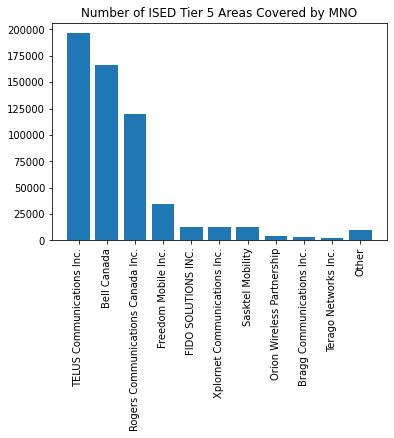

In [19]:
plt.bar(range(len(top10AndOther)), list(top10AndOther.values()))
plt.xticks(range(len(top10AndOther)), list(top10AndOther.keys()), rotation='vertical')

plt.title('Number of ISED Tier 5 Areas Covered by MNO');

### 2. Which MNO has the widest bandwidth per person in Southern Ontario?
To answer this question, we need to create a new column with values calculated by dividing the MHz bandwidth for each record to the population of each region. We have the bandwidth values in MHz in the TRANSMIT_BW column and the poulations for these regions in the Population (2016) column.

In [20]:
licenses['Bandwidth Per Person'] = licenses['TRANSMIT_BW'] / licenses['Population (2016) | Population de 2016']
licenses.head()

,Unnamed: 0,LICENSEE,TRANSMIT_BW,TX_MODEL,ISED Tier 5,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Population (2016) | Population de 2016,ISED Tier 4,ISED Tier 3,ISED Tier 2,IsHuawei,Bandwidth Per Person
0,0,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.0,4-156,3-055,2-013,False,0.003372
1,1,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.0,4-156,3-055,2-013,False,0.003372
2,2,RAGGED EDGE COMMUNITY NETWORK SOCIETY,50.0,Rocket M365,5-597,Port Hardy,BC,14829.0,4-156,3-055,2-013,False,0.003372
5,5,FlexiNET Broadband Inc.,5.0,ROCKET M365,5-614,Golden,BC,6854.0,4-163,3-051,2-013,False,0.000730
6,6,Digicom Technologies Inc.,50.0,BMAX-BST-AU-ODU-TDD-3.6b,5-208,Perkins,QC,12153.0,4-055,3-015,2-006,False,0.004114


The values in the Bandwidth Per Person are shown for each Tier 5 region; however, Southern Ontario corresponds to the Tier 2 region 2-008. We need to aggregate these amounts for this Tier 2 region by summing the values for the records that show 2-008 in their ISED Tier 2 column:

In [21]:
southernOntarioLicenses = licenses.loc[licenses['ISED Tier 2'] == '2-008']

# Create a pivot table for the Bandwidth sums by Licensee
bwPivot = np.round(pd.pivot_table(southernOntarioLicenses, values='Bandwidth Per Person', 
								index=['LICENSEE'],
								aggfunc=np.sum,
								fill_value=0),6)

# Sort by bandwidth per person
bwPivot = bwPivot.sort_values(by=['Bandwidth Per Person'],ascending=False)

# Separate the licensees after the top 10 into an 'Other' group
othersPivot = bwPivot[10:]
othersSum = othersPivot['Bandwidth Per Person'].sum()

# Append the sum of Others to the pivot
othersDF = pd.DataFrame({'Bandwidth Per Person': [othersSum]}, index =['Others'])
bwPivot = pd.concat([bwPivot[:10], othersDF])
bwPivot

,Bandwidth Per Person
Bell Canada,4.126949
Rogers Communications Canada Inc.,3.459305
Xplornet Communications Inc.,1.041566
TELUS Communications Inc.,0.534465
FIDO SOLUTIONS INC.,0.366659
Freedom Mobile Inc.,0.200307
Execulink Telecom Inc.,0.127428
Lakeland Energy Ltd,0.122299
TEKSAVVY SOLUTIONS INC.,0.119882
Tuckersmith Communications Cooperative Limited,0.029984


We will plot these results to use in the blog post:

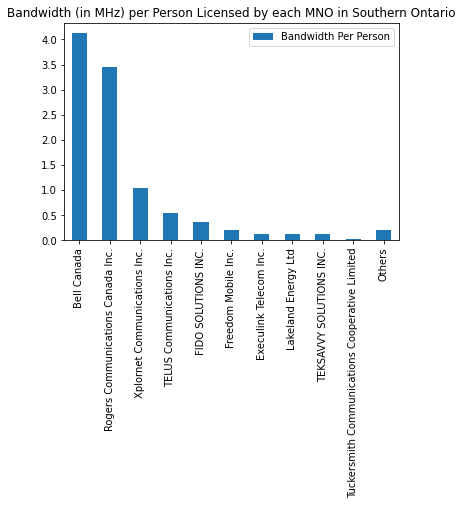

In [22]:
bwPivot.plot.bar(title = 'Bandwidth (in MHz) per Person Licensed by each MNO in Southern Ontario');

We see that Bell has the widest bandwidth per person in Southern Ontario, closely followed by Rogers. TELUS, which had the widest coverage based on our analysis for the previous question, has the 4th widest bandwidth per person.

### 3. What the proportion of each MNO's hardware is Huawei branded?
We have already prepared a column named IsHuawei, which indicates whether the transmitter model in each record is a Huawei branded hardware. To answer this question, we need to count the True values in this column for each Licensee and divide them by the number of records for each licensee.

In [27]:
# Count records (in effect, the number of hardware) categorized by MNO
numberOfRecordsByMNO = pd.pivot_table(licenses, values='IsHuawei', index=['LICENSEE'], aggfunc='count')

# Rename the column
numberOfRecordsByMNO.rename({'IsHuawei': 'Number of Records'}, axis=1, inplace=True)
numberOfRecordsByMNO

,Number of Records
LICENSEE,
0764016 BC Ltd. DBA. Swift Internet,6
1085459 Ontario Ltd.,62
2527016 Ontario Inc.,3
3C INFORMATION SOLUTIONS INC.,3
508896 Alberta Ltd Operating as NETAGO,100
...,...
Weesoe Community Communication Technologies,3
Wink High Speed Wireless Systems,5
Wire IE (Canada) Inc.,80


In [77]:
# Filtering the dataset for records where isHuawei = True
huaweiRecords = licenses.loc[licenses['IsHuawei'] == True]
huaweiRecords.head()

,Unnamed: 0,LICENSEE,TRANSMIT_BW,TX_MODEL,ISED Tier 5,Service Area Name | Nom de la zone de service,Province/territory abbreviation | Abréviation de province / territoire,Population (2016) | Population de 2016,ISED Tier 4,ISED Tier 3,ISED Tier 2,IsHuawei,Bandwidth Per Person
40,40,Xplornet Communications Inc.,20.0,RRU5258,5-394,Steinbach,MB,34551.0,4-110,3-039,2-010,True,0.000579
94,94,Corridor Communications Inc.,10.0,RRU3232,5-523,Wabamun,AB,23002.0,4-141,3-044,2-012,True,0.000435
120,120,Corridor Communications Inc.,20.0,RRU3256,5-510,Sylvan Lake,AB,43501.0,4-137,3-048,2-012,True,0.000460
127,127,Corridor Communications Inc.,20.0,RRU5258,5-498,Okotoks,AB,68431.0,4-134,3-047,2-012,True,0.000292
128,128,TELUS Communications Inc.,10.0,Huawei Radio,5-187,L'Île de Montréal | Island of Montreal,QC,1950811.0,4-051,3-013,2-005,True,0.000005


In [78]:
# Create a pivot table that counts the records where isHuawei = True by Licensee
huaweiPivot = pd.pivot_table(huaweiRecords, values='IsHuawei', index=['LICENSEE'], aggfunc='count')

huaweiPivot

,IsHuawei
LICENSEE,
ABC Allen Business Communications,45
Bell Canada,64233
Bragg Communications Inc.,35
Cogeco Communications Inc.,7
Commstream Communications Inc.,11
Corridor Communications Inc.,80
EXECULINK TELECOM INC. (PCS/Cell),3
FIDO SOLUTIONS INC.,1812
Freedom Mobile Inc.,16


We want to merge these tables to have 2 columns: `IsHuawei` and `Number of Records` so that we can create a third column by dividing these two.

We will left outter join `huaweiPivot` dataframe to the `numberOfRecordsByMNO` since we only want the licensee names that have Huawei branded hardware.

In [100]:
mergedPivot = pd.merge(huaweiPivot, numberOfRecordsByMNO , on='LICENSEE',how='left')
mergedPivot

,IsHuawei,Number of Records
LICENSEE,,
ABC Allen Business Communications,45,146
Bell Canada,64233,165836
Bragg Communications Inc.,35,3410
Cogeco Communications Inc.,7,56
Commstream Communications Inc.,11,19
Corridor Communications Inc.,80,211
EXECULINK TELECOM INC. (PCS/Cell),3,3
FIDO SOLUTIONS INC.,1812,12578
Freedom Mobile Inc.,16,34826


Now let's find the proportion of Huwaei branded hardware for each licensee.

In [101]:
mergedPivot['Proportion of Huawei'] = mergedPivot['IsHuawei'] / mergedPivot['Number of Records']
mergedPivot

,IsHuawei,Number of Records,Proportion of Huawei
LICENSEE,,,
ABC Allen Business Communications,45,146,0.308219
Bell Canada,64233,165836,0.387328
Bragg Communications Inc.,35,3410,0.010264
Cogeco Communications Inc.,7,56,0.125000
Commstream Communications Inc.,11,19,0.578947
Corridor Communications Inc.,80,211,0.379147
EXECULINK TELECOM INC. (PCS/Cell),3,3,1.000000
FIDO SOLUTIONS INC.,1812,12578,0.144061
Freedom Mobile Inc.,16,34826,0.000459


We can drop the first two columns now that we have the proportions and sort the licensees by Proportion of Huawei hardware:

In [102]:
# Drop columns
mergedPivot = mergedPivot.drop(columns=['IsHuawei', 'Number of Records'])

# Sort the results
mergedPivot = mergedPivot.sort_values(by=['Proportion of Huawei'],ascending=False)
mergedPivot

,Proportion of Huawei
LICENSEE,
i-MobileCa inc.,1.000000
Iris Technologies,1.000000
EXECULINK TELECOM INC. (PCS/Cell),1.000000
ICE WIRELESS INC.,1.000000
Vidéotron ltée,0.963814
TELUS Communications Inc.,0.930957
Xplornet Communications Inc.,0.840993
Sogetel Mobility Inc.,0.669565
Commstream Communications Inc.,0.578947


We will also change the proportions to percentages:

In [103]:
# Convert to percentages
mergedPivot = mergedPivot.apply(lambda x: round(x*100, 1))

# Change the column title to indicate these are percentages
mergedPivot.rename({'Proportion of Huawei': 'Percentage of Huawei'}, axis=1, inplace=True)
mergedPivot

,Percentage of Huawei
LICENSEE,
i-MobileCa inc.,100.0
Iris Technologies,100.0
EXECULINK TELECOM INC. (PCS/Cell),100.0
ICE WIRELESS INC.,100.0
Vidéotron ltée,96.4
TELUS Communications Inc.,93.1
Xplornet Communications Inc.,84.1
Sogetel Mobility Inc.,67.0
Commstream Communications Inc.,57.9


We will group the licensees after top 10 into 1 group named `Others (Average)`.

In [104]:
# Separate the results after the top 15 into an 'Other' group
othersPivot = mergedPivot[15:]
othersMean = othersPivot['Percentage of Huawei'].mean()

# Append the sum of Others to the pivot
othersDF = pd.DataFrame({'Percentage of Huawei': [othersMean]}, index =['Others (Average)'])
mergedPivot = pd.concat([mergedPivot[:15], othersDF])
mergedPivot

,Percentage of Huawei
i-MobileCa inc.,100.00
Iris Technologies,100.00
EXECULINK TELECOM INC. (PCS/Cell),100.00
ICE WIRELESS INC.,100.00
Vidéotron ltée,96.40
TELUS Communications Inc.,93.10
Xplornet Communications Inc.,84.10
Sogetel Mobility Inc.,67.00
Commstream Communications Inc.,57.90
Bell Canada,38.70


We will pivot this for the blog post as well:

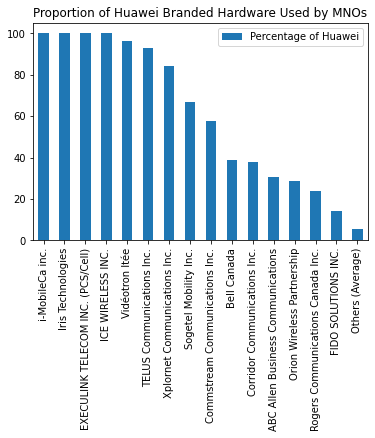

In [105]:
mergedPivot.plot.bar(title = 'Proportion of Huawei Branded Hardware Used by MNOs');